In Model M1 we made a customer churn prediction with the help of XGboost in which kilometer_cleaned where induted with the help of Xgboost, 
In Model M2 Customer churn will be predicted without  intuting and with missing values of Kilometer_clean usidng LightGBM

In [1]:
#importing all required python librabries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)
import optuna 

d:\temp\IV_Master_thesis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df= pd.read_csv('df_missing_kilometerstand.csv')

C:\Users\VIP\AppData\Local\Temp\ipykernel_2584\334928299.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('df_missing_kilometerstand.csv')


In [21]:
df.head()

,pvsnr,vsnr,status,aktiv,akt_kuka,spartek,beginn,datum_s,vtr_dau,kund_beg,vtrweg,gesbeitr,SDANZAHL,SCHAGESA,KOSTGESA,KOSTGEKA,kosten_verw,kosten_prov,gfeld,ort,plz,alter,anr,SDBEITR5,HERSTELLER,HSN,TSN,ELEKTRO,KILOMETERSTAND_CLEAN,claim,ersz_final,beg_year,beg_month,beg_day,weekday,Quarter,Weekday_id,Cus_type,Cus_typ_id,ort_id,Sex_id,Sex,gender_id,plz_id,Hersteller_id,state,state_id,status_id,First_reg,Car_age_indays,carage_years,TSN_id,estimated_total_paid
0,1012223,01012223-003,Aktiv,1,1,1,2013-06-16,NaN,4306.0,17.09.1969,1,110.00,0.0,0.00,0.00,0.00,70.54,41.38,70270/ Privatkunden,Flensburg,24944,83.0,71296/ Frau,404.26,VOLKSWAGEN-VW,603.0,1346.0,1,104982.0,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5847,16.0,1,953.832088
1,1012223,01012223-003,Aktiv,1,1,2,2013-06-16,NaN,4306.0,17.09.1969,1,253.96,0.0,0.00,0.00,0.00,186.81,89.36,70270/ Privatkunden,Flensburg,24944,83.0,71296/ Frau,1076.16,VOLKSWAGEN-VW,603.0,1346.0,1,104982.0,0,16JUN2009,2013,6,16,Sunday,2,1,70270,1,1,71296,Frau,1,1,1,Schleswig-Holstein,1,1,2009-06-16,5847,16.0,1,2539.147923
2,1013206,01013206-003,Aktiv,1,1,1,2013-01-01,NaN,4472.0,21.07.1977,1,313.58,0.0,0.00,0.00,0.00,232.13,135.88,70270/ Privatkunden,Sieverstedt,24885,74.0,71295/ Herr,1327.05,BMW BAYERISCHE MOTORENWER,5.0,2842.0,1,35000.0,0,11DEC2020,2013,1,1,Tuesday,1,2,70270,1,3,71295,Herr,3,3,3,Schleswig-Holstein,1,1,2020-12-11,1651,5.0,2,3251.817863
3,1013206,01013206-003,Aktiv,1,1,2,2013-01-01,NaN,4472.0,21.07.1977,1,95.42,1.0,3481.01,3481.01,4402.64,82.90,39.66,70270/ Privatkunden,Sieverstedt,24885,74.0,71295/ Herr,478.44,BMW BAYERISCHE MOTORENWER,5.0,2842.0,1,35000.0,1,11DEC2020,2013,1,1,Tuesday,1,2,70270,1,3,71295,Herr,3,3,3,Schleswig-Holstein,1,1,2020-12-11,1651,5.0,2,1172.374619
4,1013242,01013242-004,Aktiv,1,1,2,2012-01-01,NaN,4838.0,26.09.1975,1,212.80,0.0,0.00,0.00,0.00,155.16,74.26,70270/ Privatkunden,Lrschau,24850,82.0,71296/ Frau,894.10,NISSAN (J),1329.0,1104.0,1,28000.0,0,02APR2009,2012,1,1,Sunday,1,1,70270,1,4,71296,Frau,1,4,2,Schleswig-Holstein,1,1,2009-04-02,5922,16.0,3,2370.222356


In [22]:
df.isnull().sum()

pvsnr                        0
vsnr                         0
status                       0
aktiv                        0
akt_kuka                     0
spartek                      0
beginn                       0
datum_s                 999192
vtr_dau                      0
kund_beg                     0
vtrweg                       0
gesbeitr                     0
SDANZAHL                     0
SCHAGESA                     0
KOSTGESA                     0
KOSTGEKA                     0
kosten_verw                  0
kosten_prov                  0
gfeld                        0
ort                          0
plz                          0
alter                        0
anr                          0
SDBEITR5                     0
HERSTELLER                   0
HSN                         19
TSN                          0
ELEKTRO                      0
KILOMETERSTAND_CLEAN    380244
claim                        0
ersz_final                   0
beg_year                     0
beg_mont

In [8]:
df.shape

(2335742, 53)

In [9]:
df['Dura_in_yrs'] = df['vtr_dau'] // 365
df = df[df['carage_years'] < 13]
columns_needed = [
    "vsnr",'aktiv', "vtr_dau","Dura_in_yrs", "vtrweg", "SDANZAHL", "SCHAGESA", "KOSTGESA",
    "kosten_verw", "kosten_prov", "alter", "ELEKTRO", "KILOMETERSTAND_CLEAN",
    "claim", "beg_year", "beg_month", "Quarter", "Weekday_id", "Cus_typ_id",
    "ort_id", "gender_id", "plz_id", "Hersteller_id", "state_id", "TSN_id",
    "estimated_total_paid",'spartek','carage_years','Car_age_indays']

In [25]:
df.shape

(1040849, 54)

In [10]:
df= df[columns_needed]

In [11]:
# PART 1: SETUP AND DATA PREPARATION
# Run this first to set up your data

import pandas as pd
import numpy as np
import optuna
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, accuracy_score
import lightgbm as lgb

# ✅ 1. Select features and target
selected_features = [ 
    "estimated_total_paid",
    "vtr_dau",
    "kosten_verw", 
    "kosten_prov", 
    "alter", 
    "KILOMETERSTAND_CLEAN", 
    "claim"
]
target = 'aktiv'

print("🚀 Starting Enhanced LightGBM Training with Optuna")
print(f"📊 Features: {len(selected_features)}")
print(f"🎯 Target: {target}")

# ✅ 2. Prepare data (changed from df_imp to df)
df_model = df[selected_features + [target]].dropna()
print(f"📈 Dataset shape after cleaning: {df_model.shape}")
print(f"🎲 Target distribution:\n{df_model[target].value_counts(normalize=True)}")

X = df_model[selected_features]
y = df_model[target]

# Identify categorical features for LightGBM
categorical_features = []
for col in selected_features:
    if X[col].dtype == 'object' or col.endswith('_id'):
        categorical_features.append(col)
        
print(f"🏷️ Categorical features detected: {categorical_features}")

# ✅ 3. Split data strategically
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.11, random_state=42, stratify=y_temp
)

print(f"📊 Data splits:")
print(f"   Training: {X_train.shape[0]} samples")
print(f"   Validation: {X_val.shape[0]} samples") 
print(f"   Test: {X_test.shape[0]} samples")

# ✅ 4. Enhanced Optuna objective function for LightGBM
def objective(trial):
    """
    Enhanced objective function with regularization focus to combat overfitting
    """
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 0.9),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 0.9),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.1, 3.0),  # L1 regularization
        'lambda_l2': trial.suggest_float('lambda_l2', 0.1, 3.0),  # L2 regularization
        'min_gain_to_split': trial.suggest_float('min_gain_to_split', 0, 2),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'verbosity': -1,
        'random_state': 42,
        'n_jobs': -1
    }
    
    # Use cross-validation for robust evaluation
    model = lgb.LGBMClassifier(**params, n_estimators=200)
    cv_scores = cross_val_score(
        model, X_train, y_train, 
        cv=3,  # 3-fold CV for speed
        scoring='f1',
        n_jobs=-1
    )
    
    return cv_scores.mean()

# ✅ 5. Run Optuna optimization with progress tracking
def print_callback(study, trial):
    """Callback to print progress"""
    print(f"⚡ Trial {trial.number:3d}: F1 = {trial.value:.4f} | Best = {study.best_value:.4f}")

print("\n🔍 Starting hyperparameter optimization...")
study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)
)

n_trials = 20  

study.optimize(
    objective, 
    n_trials=n_trials,
    callbacks=[print_callback],
    show_progress_bar=True
)

print(f"\n🎯 Optimization completed!")
print(f"🏆 Best F1-Score: {study.best_value:.4f}")
print(f"📋 Best Parameters:")
for key, value in study.best_params.items():
    print(f"   {key}: {value}")

print("✅ Part 2 completed! Best parameters found.")

🚀 Starting Enhanced LightGBM Training with Optuna
📊 Features: 7
🎯 Target: aktiv
📈 Dataset shape after cleaning: (877729, 8)
🎲 Target distribution:
aktiv
0    0.504453
1    0.495547
Name: proportion, dtype: float64
🏷️ Categorical features detected: []


[I 2025-06-22 21:17:29,218] A new study created in memory with name: no-name-941c81ae-a76c-4231-a7d2-68061ca00a6a


📊 Data splits:
   Training: 703060 samples
   Validation: 86896 samples
   Test: 87773 samples

🔍 Starting hyperparameter optimization...


Best trial: 0. Best value: 0.859091:   5%|▌         | 1/20 [01:04<20:31, 64.83s/it]

[I 2025-06-22 21:18:34,033] Trial 0 finished with value: 0.859090843455964 and parameters: {'num_leaves': 44, 'learning_rate': 0.19063571821788408, 'feature_fraction': 0.8195981825434215, 'bagging_fraction': 0.779597545259111, 'bagging_freq': 2, 'min_child_samples': 12, 'lambda_l1': 0.2684424752877784, 'lambda_l2': 2.611910822747312, 'min_gain_to_split': 1.2022300234864176, 'max_depth': 7}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial   0: F1 = 0.8591 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  10%|█         | 2/20 [01:39<14:10, 47.25s/it]

[I 2025-06-22 21:19:08,989] Trial 1 finished with value: 0.8422011293687813 and parameters: {'num_leaves': 11, 'learning_rate': 0.19428287191077892, 'feature_fraction': 0.8497327922401265, 'bagging_fraction': 0.6637017332034828, 'bagging_freq': 2, 'min_child_samples': 13, 'lambda_l1': 0.9823025045826593, 'lambda_l2': 1.6217936517334899, 'min_gain_to_split': 0.8638900372842315, 'max_depth': 4}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial   1: F1 = 0.8422 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  15%|█▌        | 3/20 [02:18<12:14, 43.20s/it]

[I 2025-06-22 21:19:47,374] Trial 2 finished with value: 0.814246202050381 and parameters: {'num_leaves': 65, 'learning_rate': 0.036503833523887946, 'feature_fraction': 0.6876433945605654, 'bagging_fraction': 0.7099085529881075, 'bagging_freq': 4, 'min_child_samples': 41, 'lambda_l1': 0.6790539682592432, 'lambda_l2': 1.5912798713994738, 'min_gain_to_split': 1.184829137724085, 'max_depth': 3}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial   2: F1 = 0.8142 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  20%|██        | 4/20 [03:03<11:47, 44.23s/it]

[I 2025-06-22 21:20:33,171] Trial 3 finished with value: 0.8317517572969136 and parameters: {'num_leaves': 65, 'learning_rate': 0.04239958350058539, 'feature_fraction': 0.6195154778955838, 'bagging_fraction': 0.884665661176, 'bagging_freq': 7, 'min_child_samples': 42, 'lambda_l1': 0.983379930602775, 'lambda_l2': 0.3832491306185132, 'min_gain_to_split': 1.3684660530243138, 'max_depth': 5}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial   3: F1 = 0.8318 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  25%|██▌       | 5/20 [03:43<10:36, 42.45s/it]

[I 2025-06-22 21:21:12,474] Trial 4 finished with value: 0.8369518674382724 and parameters: {'num_leaves': 21, 'learning_rate': 0.10408361292114134, 'feature_fraction': 0.6103165563345655, 'bagging_fraction': 0.8727961206236347, 'bagging_freq': 2, 'min_child_samples': 35, 'lambda_l1': 1.0039621206592917, 'lambda_l2': 1.6081972614156514, 'min_gain_to_split': 1.0934205586865593, 'max_depth': 4}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial   4: F1 = 0.8370 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  30%|███       | 6/20 [04:12<08:50, 37.92s/it]

[I 2025-06-22 21:21:41,605] Trial 5 finished with value: 0.8407989462069506 and parameters: {'num_leaves': 98, 'learning_rate': 0.15727523643861177, 'feature_fraction': 0.8818496824692568, 'bagging_fraction': 0.8684482051282947, 'bagging_freq': 5, 'min_child_samples': 47, 'lambda_l1': 0.3566282559505666, 'lambda_l2': 0.6683503010155211, 'min_gain_to_split': 0.09045457782107613, 'max_depth': 4}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial   5: F1 = 0.8408 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  35%|███▌      | 7/20 [05:01<09:02, 41.71s/it]

[I 2025-06-22 21:22:31,109] Trial 6 finished with value: 0.8455032678339273 and parameters: {'num_leaves': 45, 'learning_rate': 0.061556316037040225, 'feature_fraction': 0.8486212527455788, 'bagging_fraction': 0.7070259980080768, 'bagging_freq': 2, 'min_child_samples': 29, 'lambda_l1': 0.5086802524268117, 'lambda_l2': 2.426371244186715, 'min_gain_to_split': 0.14910128735954165, 'max_depth': 8}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial   6: F1 = 0.8455 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  40%|████      | 8/20 [05:27<07:19, 36.66s/it]

[I 2025-06-22 21:22:56,930] Trial 7 finished with value: 0.8179825814935032 and parameters: {'num_leaves': 80, 'learning_rate': 0.04775597949149276, 'feature_fraction': 0.6016566351370807, 'bagging_fraction': 0.8446384285364503, 'bagging_freq': 5, 'min_child_samples': 38, 'lambda_l1': 2.336684005389243, 'lambda_l2': 0.3147294900288621, 'min_gain_to_split': 0.7169314570885452, 'max_depth': 3}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial   7: F1 = 0.8180 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  45%|████▌     | 9/20 [06:19<07:36, 41.53s/it]

[I 2025-06-22 21:23:49,188] Trial 8 finished with value: 0.84241266658894 and parameters: {'num_leaves': 88, 'learning_rate': 0.128426644097236, 'feature_fraction': 0.6992694074557948, 'bagging_fraction': 0.6190675050858071, 'bagging_freq': 3, 'min_child_samples': 19, 'lambda_l1': 2.215857917180386, 'lambda_l2': 1.9489166669301181, 'min_gain_to_split': 1.774425485152653, 'max_depth': 5}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial   8: F1 = 0.8424 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  50%|█████     | 10/20 [07:04<07:03, 42.34s/it]

[I 2025-06-22 21:24:33,330] Trial 9 finished with value: 0.8356246529783337 and parameters: {'num_leaves': 20, 'learning_rate': 0.14551650957236906, 'feature_fraction': 0.8282355145850693, 'bagging_fraction': 0.7683831592708489, 'bagging_freq': 6, 'min_child_samples': 27, 'lambda_l1': 1.6159252052077828, 'lambda_l2': 1.339868953239794, 'min_gain_to_split': 0.05083825348819038, 'max_depth': 3}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial   9: F1 = 0.8356 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  55%|█████▌    | 11/20 [07:46<06:21, 42.41s/it]

[I 2025-06-22 21:25:15,923] Trial 10 finished with value: 0.8556122192977087 and parameters: {'num_leaves': 44, 'learning_rate': 0.18724377998959227, 'feature_fraction': 0.7777093115363782, 'bagging_fraction': 0.7962507917821569, 'bagging_freq': 1, 'min_child_samples': 6, 'lambda_l1': 2.8833351632417186, 'lambda_l2': 2.930805709588186, 'min_gain_to_split': 1.8939237527802988, 'max_depth': 8}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial  10: F1 = 0.8556 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  60%|██████    | 12/20 [08:27<05:36, 42.05s/it]

[I 2025-06-22 21:25:57,130] Trial 11 finished with value: 0.8558464807637555 and parameters: {'num_leaves': 41, 'learning_rate': 0.18970384679500554, 'feature_fraction': 0.7831899423567357, 'bagging_fraction': 0.794014447590537, 'bagging_freq': 1, 'min_child_samples': 5, 'lambda_l1': 2.9737559306422403, 'lambda_l2': 2.996930753720212, 'min_gain_to_split': 1.8993202484538119, 'max_depth': 8}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial  11: F1 = 0.8558 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  65%|██████▌   | 13/20 [09:11<04:57, 42.51s/it]

[I 2025-06-22 21:26:40,716] Trial 12 finished with value: 0.8551196837084664 and parameters: {'num_leaves': 36, 'learning_rate': 0.17311077285988852, 'feature_fraction': 0.7827221590301234, 'bagging_fraction': 0.8072736437500273, 'bagging_freq': 1, 'min_child_samples': 6, 'lambda_l1': 1.7344648762456336, 'lambda_l2': 2.9884479420675634, 'min_gain_to_split': 1.429155231177126, 'max_depth': 7}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial  12: F1 = 0.8551 | Best = 0.8591


Best trial: 0. Best value: 0.859091:  70%|███████   | 14/20 [09:48<04:05, 41.00s/it]

[I 2025-06-22 21:27:18,214] Trial 13 finished with value: 0.8473811078982108 and parameters: {'num_leaves': 34, 'learning_rate': 0.10057073115764902, 'feature_fraction': 0.7357900736614533, 'bagging_fraction': 0.7666475715492841, 'bagging_freq': 3, 'min_child_samples': 15, 'lambda_l1': 2.9299398789038578, 'lambda_l2': 2.3560489080210436, 'min_gain_to_split': 0.5577646342534865, 'max_depth': 7}. Best is trial 0 with value: 0.859090843455964.
⚡ Trial  13: F1 = 0.8474 | Best = 0.8591


Best trial: 14. Best value: 0.859358:  75%|███████▌  | 15/20 [10:39<03:39, 43.86s/it]

[I 2025-06-22 21:28:08,722] Trial 14 finished with value: 0.8593582459458523 and parameters: {'num_leaves': 59, 'learning_rate': 0.19697231506256319, 'feature_fraction': 0.8050530698249393, 'bagging_fraction': 0.7281611217973673, 'bagging_freq': 1, 'min_child_samples': 12, 'lambda_l1': 0.1600242561743596, 'lambda_l2': 2.528658353758248, 'min_gain_to_split': 1.6851597783612458, 'max_depth': 7}. Best is trial 14 with value: 0.8593582459458523.
⚡ Trial  14: F1 = 0.8594 | Best = 0.8594


Best trial: 14. Best value: 0.859358:  80%|████████  | 16/20 [11:28<03:01, 45.32s/it]

[I 2025-06-22 21:28:57,431] Trial 15 finished with value: 0.8492486177502213 and parameters: {'num_leaves': 61, 'learning_rate': 0.12965600759356213, 'feature_fraction': 0.8993794670696741, 'bagging_fraction': 0.7222338757443971, 'bagging_freq': 3, 'min_child_samples': 22, 'lambda_l1': 0.10131542604512184, 'lambda_l2': 2.417212196205198, 'min_gain_to_split': 1.5274947898297058, 'max_depth': 6}. Best is trial 14 with value: 0.8593582459458523.
⚡ Trial  15: F1 = 0.8492 | Best = 0.8594


Best trial: 14. Best value: 0.859358:  85%|████████▌ | 17/20 [12:24<02:25, 48.59s/it]

[I 2025-06-22 21:29:53,627] Trial 16 finished with value: 0.8571995010275684 and parameters: {'num_leaves': 75, 'learning_rate': 0.16382107099010357, 'feature_fraction': 0.8142866147567633, 'bagging_fraction': 0.6639850006893366, 'bagging_freq': 2, 'min_child_samples': 12, 'lambda_l1': 0.25566340563479795, 'lambda_l2': 2.1000558331141255, 'min_gain_to_split': 1.591754887203965, 'max_depth': 7}. Best is trial 14 with value: 0.8593582459458523.
⚡ Trial  16: F1 = 0.8572 | Best = 0.8594


Best trial: 14. Best value: 0.859358:  90%|█████████ | 18/20 [13:14<01:38, 49.07s/it]

[I 2025-06-22 21:30:43,790] Trial 17 finished with value: 0.8544058464096489 and parameters: {'num_leaves': 49, 'learning_rate': 0.19950383106039166, 'feature_fraction': 0.7279039998282282, 'bagging_fraction': 0.7384938811676811, 'bagging_freq': 1, 'min_child_samples': 21, 'lambda_l1': 0.7025555929504381, 'lambda_l2': 1.1124015052549698, 'min_gain_to_split': 1.1842470960975546, 'max_depth': 6}. Best is trial 14 with value: 0.8593582459458523.
⚡ Trial  17: F1 = 0.8544 | Best = 0.8594


Best trial: 14. Best value: 0.859358:  95%|█████████▌| 19/20 [13:56<00:46, 46.99s/it]

[I 2025-06-22 21:31:25,932] Trial 18 finished with value: 0.8469796812754683 and parameters: {'num_leaves': 54, 'learning_rate': 0.08677363946937215, 'feature_fraction': 0.8096842661129607, 'bagging_fraction': 0.6801761290369058, 'bagging_freq': 4, 'min_child_samples': 11, 'lambda_l1': 1.3943338245051056, 'lambda_l2': 2.6665141132727954, 'min_gain_to_split': 1.6653449926782113, 'max_depth': 7}. Best is trial 14 with value: 0.8593582459458523.
⚡ Trial  18: F1 = 0.8470 | Best = 0.8594


Best trial: 14. Best value: 0.859358: 100%|██████████| 20/20 [14:41<00:00, 44.09s/it]

[I 2025-06-22 21:32:10,967] Trial 19 finished with value: 0.822594104559232 and parameters: {'num_leaves': 28, 'learning_rate': 0.014155930449042647, 'feature_fraction': 0.8642047988539111, 'bagging_fraction': 0.8316869446562314, 'bagging_freq': 3, 'min_child_samples': 28, 'lambda_l1': 1.3587706853645796, 'lambda_l2': 2.0060005425239744, 'min_gain_to_split': 0.4185538716892885, 'max_depth': 6}. Best is trial 14 with value: 0.8593582459458523.
⚡ Trial  19: F1 = 0.8226 | Best = 0.8594

🎯 Optimization completed!
🏆 Best F1-Score: 0.8594
📋 Best Parameters:
   num_leaves: 59
   learning_rate: 0.19697231506256319
   feature_fraction: 0.8050530698249393
   bagging_fraction: 0.7281611217973673
   bagging_freq: 1
   min_child_samples: 12
   lambda_l1: 0.1600242561743596
   lambda_l2: 2.528658353758248
   min_gain_to_split: 1.6851597783612458
   max_depth: 7
✅ Part 2 completed! Best parameters found.


In [12]:
# ✅ 6. Train final model with best parameters
print("\n🏗️ Training final model...")
best_params = study.best_params.copy()
best_params.update({
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1,
    'random_state': 42,
    'n_jobs': -1,
    'n_estimators': 500  # Increase estimators for final model
})

final_model = lgb.LGBMClassifier(**best_params)

# Fit with evaluation set for early stopping
final_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='binary_logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(0)]
)

# 💾 Save the model
model_filename = 'lightgbm_model.pkl'
joblib.dump(final_model, model_filename)
print(f"💾 Model saved as: {model_filename}")

# ✅ 7. Comprehensive evaluation on validation set
print("\n📊 VALIDATION SET EVALUATION:")
y_pred_val = final_model.predict(X_val)
y_pred_proba_val = final_model.predict_proba(X_val)[:, 1]

print("Classification Report:")
print(classification_report(y_val, y_pred_val))

# Additional metrics
val_f1 = f1_score(y_val, y_pred_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
val_auc = roc_auc_score(y_val, y_pred_proba_val)

print(f"📈 Additional Metrics:")
print(f"   F1-Score: {val_f1:.4f}")
print(f"   Accuracy: {val_accuracy:.4f}")
print(f"   ROC-AUC: {val_auc:.4f}")

# ✅ 8. Final evaluation on test set
print("\n🎯 FINAL TEST SET EVALUATION:")
y_pred_test = final_model.predict(X_test)
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Test metrics
test_f1 = f1_score(y_test, y_pred_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_pred_proba_test)

print(f"📈 Test Set Metrics:")
print(f"   F1-Score: {test_f1:.4f}")
print(f"   Accuracy: {test_accuracy:.4f}")
print(f"   ROC-AUC: {test_auc:.4f}")

# Overfitting check
f1_diff = abs(val_f1 - test_f1)
if f1_diff < 0.02:
    print(f"✅ Model generalization: Excellent (F1 diff: {f1_diff:.4f})")
elif f1_diff < 0.05:
    print(f"⚠️  Model generalization: Good (F1 diff: {f1_diff:.4f})")
else:
    print(f"❌ Model generalization: Poor (F1 diff: {f1_diff:.4f})")

print("✅ Part 3 completed! Model trained and evaluated.")



🏗️ Training final model...


Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.298615
💾 Model saved as: lightgbm_model.pkl

📊 VALIDATION SET EVALUATION:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     43835
           1       0.83      0.92      0.87     43061

    accuracy                           0.87     86896
   macro avg       0.87      0.87      0.87     86896
weighted avg       0.87      0.87      0.87     86896

📈 Additional Metrics:
   F1-Score: 0.8725
   Accuracy: 0.8665
   ROC-AUC: 0.9411

🎯 FINAL TEST SET EVALUATION:
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86     44277
           1       0.83      0.92      0.87     43496

    accuracy                           0.87     87773
   macro avg       0.87      0.87      0.87     87773
weighted avg       0.87    

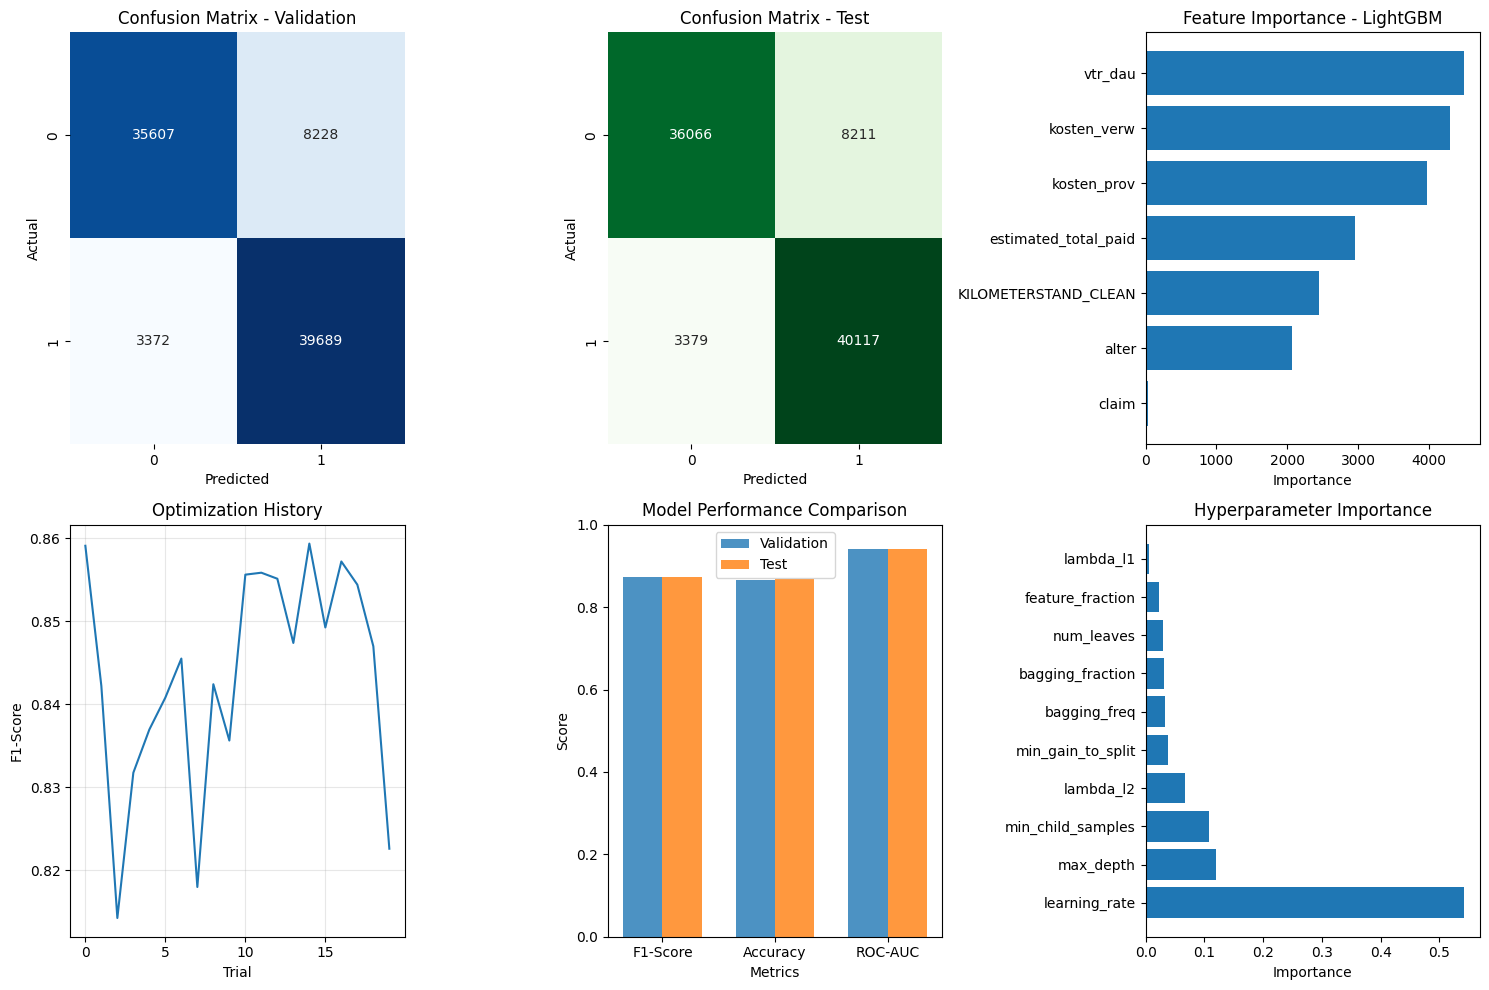


📊 LightGBM Specific Analysis:


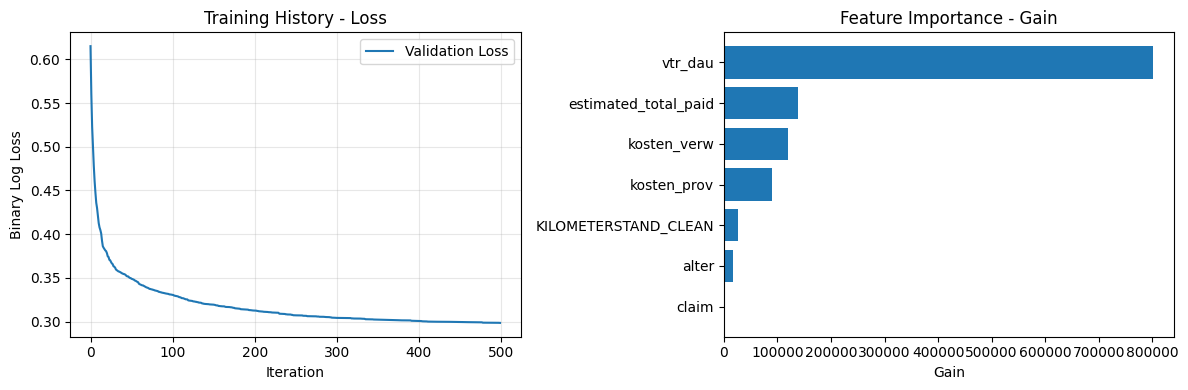


📋 FINAL LIGHTGBM SUMMARY REPORT
🎯 Best Hyperparameters Found:
   num_leaves: 59
   learning_rate: 0.19697231506256319
   feature_fraction: 0.8050530698249393
   bagging_fraction: 0.7281611217973673
   bagging_freq: 1
   min_child_samples: 12
   lambda_l1: 0.1600242561743596
   lambda_l2: 2.528658353758248
   min_gain_to_split: 1.6851597783612458
   max_depth: 7

📊 Performance Summary:
   Validation F1: 0.8725
   Test F1:       0.8738
   Validation AUC: 0.9411
   Test AUC:       0.9419

🏷️ Categorical Features: []
🌳 Final number of trees: 500
🛑 Early stopping rounds: 0

💾 Model saved as: lightgbm_model.pkl
🎉 LightGBM Training completed successfully!
📊 Study results saved as: lightgbm_optuna_study_results.pkl

📈 Results Summary:
      Dataset  F1_Score  Accuracy   ROC_AUC
0  Validation  0.872497  0.866507  0.941127
1        Test  0.873780  0.867955  0.941910

🔍 LightGBM vs XGBoost Insights:
   • LightGBM typically trains faster than XGBoost
   • LightGBM uses leaf-wise tree growth (vs l

In [13]:
# PART 4: VISUALIZATIONS AND FINAL REPORT
# Run this after Part 3 is completed

# ✅ 9. Visualizations
plt.figure(figsize=(15, 10))

# Confusion Matrix - Validation
plt.subplot(2, 3, 1)
cm_val = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Validation")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Confusion Matrix - Test
plt.subplot(2, 3, 2)
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Feature Importance
plt.subplot(2, 3, 3)
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.barh(range(len(importance_df)), importance_df['Importance'])
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.title("Feature Importance - LightGBM")
plt.xlabel("Importance")

# Optuna optimization history
plt.subplot(2, 3, 4)
trials_df = study.trials_dataframe()
plt.plot(trials_df['number'], trials_df['value'])
plt.title("Optimization History")
plt.xlabel("Trial")
plt.ylabel("F1-Score")
plt.grid(True, alpha=0.3)

# Performance comparison
plt.subplot(2, 3, 5)
metrics = ['F1-Score', 'Accuracy', 'ROC-AUC']
val_scores = [val_f1, val_accuracy, val_auc]
test_scores = [test_f1, test_accuracy, test_auc]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, val_scores, width, label='Validation', alpha=0.8)
plt.bar(x + width/2, test_scores, width, label='Test', alpha=0.8)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)

# Parameter importance
plt.subplot(2, 3, 6)
param_importance = optuna.importance.get_param_importances(study)
params = list(param_importance.keys())
importances = list(param_importance.values())

plt.barh(range(len(params)), importances)
plt.yticks(range(len(params)), params)
plt.title("Hyperparameter Importance")
plt.xlabel("Importance")

plt.tight_layout()
plt.show()

# ✅ 10. LightGBM specific visualizations
print("\n📊 LightGBM Specific Analysis:")

# Training history
plt.figure(figsize=(12, 4))

# Training loss curve
plt.subplot(1, 2, 1)
results = final_model.evals_result_
if 'valid_0' in results:
    plt.plot(results['valid_0']['binary_logloss'], label='Validation Loss')
    plt.title('Training History - Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Binary Log Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Feature importance by different metrics
plt.subplot(1, 2, 2)
# Get feature importance by gain
importance_gain = final_model.booster_.feature_importance(importance_type='gain')
importance_df_gain = pd.DataFrame({
    'Feature': selected_features,
    'Gain': importance_gain
}).sort_values(by='Gain', ascending=True)

plt.barh(range(len(importance_df_gain)), importance_df_gain['Gain'])
plt.yticks(range(len(importance_df_gain)), importance_df_gain['Feature'])
plt.title("Feature Importance - Gain")
plt.xlabel("Gain")

plt.tight_layout()
plt.show()

# ✅ 11. Summary report
print("\n" + "="*60)
print("📋 FINAL LIGHTGBM SUMMARY REPORT")
print("="*60)
print(f"🎯 Best Hyperparameters Found:")
for param, value in study.best_params.items():
    print(f"   {param}: {value}")

print(f"\n📊 Performance Summary:")
print(f"   Validation F1: {val_f1:.4f}")
print(f"   Test F1:       {test_f1:.4f}")
print(f"   Validation AUC: {val_auc:.4f}")
print(f"   Test AUC:       {test_auc:.4f}")

print(f"\n🏷️ Categorical Features: {categorical_features}")
print(f"🌳 Final number of trees: {final_model.n_estimators}")
print(f"🛑 Early stopping rounds: {final_model.n_estimators - len(results['valid_0']['binary_logloss']) if 'valid_0' in results else 'N/A'}")

print(f"\n💾 Model saved as: {model_filename}")
print("🎉 LightGBM Training completed successfully!")

# ✅ 12. Optional: Save study results
study_filename = 'lightgbm_optuna_study_results.pkl'
joblib.dump(study, study_filename)
print(f"📊 Study results saved as: {study_filename}")

# Create results dataframe for future analysis
results_df = pd.DataFrame({
    'Dataset': ['Validation', 'Test'],
    'F1_Score': [val_f1, test_f1],
    'Accuracy': [val_accuracy, test_accuracy],
    'ROC_AUC': [val_auc, test_auc]
})

print(f"\n📈 Results Summary:")
print(results_df)

# ✅ 13. Model comparison insights
print(f"\n🔍 LightGBM vs XGBoost Insights:")
print(f"   • LightGBM typically trains faster than XGBoost")
print(f"   • LightGBM uses leaf-wise tree growth (vs level-wise)")
print(f"   • Better memory efficiency with categorical features")
print(f"   • Native support for categorical features detected: {len(categorical_features)} features")

print("✅ Part 4 completed! All visualizations and reports generated.")

# ✅ 14. Optional: Quick prediction function
def predict_with_model(model, new_data):
    """Helper function for making predictions with the trained model"""
    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]
    return predictions, probabilities

print(f"\n🔮 Model ready for predictions!")
print(f"   Use: predict_with_model(final_model, your_new_data)")

In [19]:
import joblib
import pandas as pd

# Step 1: Load the model using joblib
model = joblib.load('lightgbm_model.pkl')

# Step 2: Define your real-time input data
input_data = {
    "estimated_total_paid": 162,
    "vtr_dau": 139,
    "kosten_verw": 28,
    "kosten_prov": 13,
    "alter": 60,
    "KILOMETERSTAND_CLEAN": 150,
    "claim": 0
}

# Step 3: Convert the input to a DataFrame
input_df = pd.DataFrame([input_data])

# Step 4: Make the prediction
prediction = model.predict(input_df)

print("Prediction:", prediction[0])


Prediction: 0


In [14]:
# FEATURE DOMINANCE ANALYSIS AND SOLUTIONS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
import lightgbm as lgb

# ✅ 1. ANALYZE FEATURE DOMINANCE
def analyze_feature_dominance(model, feature_names, threshold=0.5):
    """
    Analyze if any feature is too dominant
    """
    importance = model.feature_importances_
    total_importance = sum(importance)
    
    # Calculate relative importance
    relative_importance = importance / total_importance
    
    # Create analysis dataframe
    analysis_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance,
        'Relative_Importance': relative_importance,
        'Cumulative_Importance': np.cumsum(relative_importance)
    }).sort_values('Importance', ascending=False)
    
    print("🔍 FEATURE DOMINANCE ANALYSIS")
    print("="*50)
    print(analysis_df)
    
    # Check for dominance
    dominant_features = analysis_df[analysis_df['Relative_Importance'] > threshold]
    
    if len(dominant_features) > 0:
        print(f"\n⚠️ DOMINANT FEATURES DETECTED (>{threshold*100}% importance):")
        for _, row in dominant_features.iterrows():
            print(f"   {row['Feature']}: {row['Relative_Importance']:.1%}")
    else:
        print(f"\n✅ No overly dominant features detected")
    
    return analysis_df

# ✅ 2. TEST MODEL WITHOUT DOMINANT FEATURE
def test_without_dominant_feature(X_train, X_val, X_test, y_train, y_val, y_test, 
                                 dominant_feature, best_params):
    """
    Test model performance without the dominant feature
    """
    print(f"\n🧪 TESTING MODEL WITHOUT '{dominant_feature}'")
    print("="*50)
    
    # Remove dominant feature
    X_train_reduced = X_train.drop(columns=[dominant_feature])
    X_val_reduced = X_val.drop(columns=[dominant_feature])
    X_test_reduced = X_test.drop(columns=[dominant_feature])
    
    # Train model without dominant feature
    model_reduced = lgb.LGBMClassifier(**best_params)
    model_reduced.fit(
        X_train_reduced, y_train,
        eval_set=[(X_val_reduced, y_val)],
        callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(0)]
    )
    
    # Evaluate
    y_pred_val = model_reduced.predict(X_val_reduced)
    y_pred_test = model_reduced.predict(X_test_reduced)
    y_pred_proba_val = model_reduced.predict_proba(X_val_reduced)[:, 1]
    y_pred_proba_test = model_reduced.predict_proba(X_test_reduced)[:, 1]
    
    # Calculate metrics
    val_f1_reduced = f1_score(y_val, y_pred_val)
    test_f1_reduced = f1_score(y_test, y_pred_test)
    val_auc_reduced = roc_auc_score(y_val, y_pred_proba_val)
    test_auc_reduced = roc_auc_score(y_test, y_pred_proba_test)
    
    print(f"📊 Performance without '{dominant_feature}':")
    print(f"   Validation F1: {val_f1_reduced:.4f}")
    print(f"   Test F1: {test_f1_reduced:.4f}")
    print(f"   Validation AUC: {val_auc_reduced:.4f}")
    print(f"   Test AUC: {test_auc_reduced:.4f}")
    
    return {
        'model': model_reduced,
        'val_f1': val_f1_reduced,
        'test_f1': test_f1_reduced,
        'val_auc': val_auc_reduced,
        'test_auc': test_auc_reduced
    }

# ✅ 3. CORRELATION ANALYSIS
def analyze_feature_correlations(df, target_col):
    """
    Analyze correlations between features and target
    """
    print(f"\n📈 CORRELATION ANALYSIS WITH TARGET '{target_col}'")
    print("="*50)
    
    # Calculate correlations
    correlations = df.corr()[target_col].sort_values(ascending=False)
    
    print("Feature correlations with target:")
    for feature, corr in correlations.items():
        if feature != target_col:
            print(f"   {feature}: {corr:.4f}")
    
    # Visualize correlations
    plt.figure(figsize=(10, 6))
    correlations_clean = correlations.drop(target_col)
    plt.barh(range(len(correlations_clean)), correlations_clean.values)
    plt.yticks(range(len(correlations_clean)), correlations_clean.index)
    plt.title(f'Feature Correlations with {target_col}')
    plt.xlabel('Correlation Coefficient')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return correlations

# ✅ 4. DATA LEAKAGE CHECK
def check_data_leakage(df, target_col, suspicious_features):
    """
    Check for potential data leakage
    """
    print(f"\n🔍 DATA LEAKAGE CHECK")
    print("="*50)
    
    for feature in suspicious_features:
        if feature in df.columns:
            # Check correlation
            corr = df[feature].corr(df[target_col])
            
            # Check if feature values are suspiciously different between classes
            active_mean = df[df[target_col] == 1][feature].mean()
            inactive_mean = df[df[target_col] == 0][feature].mean()
            ratio = active_mean / inactive_mean if inactive_mean != 0 else float('inf')
            
            print(f"📊 {feature}:")
            print(f"   Correlation with target: {corr:.4f}")
            print(f"   Active customers mean: {active_mean:.2f}")
            print(f"   Inactive customers mean: {inactive_mean:.2f}")
            print(f"   Ratio (active/inactive): {ratio:.2f}")
            
            if abs(corr) > 0.8:
                print(f"   ⚠️ HIGH CORRELATION - Potential leakage!")
            if ratio > 10 or ratio < 0.1:
                print(f"   ⚠️ EXTREME DIFFERENCE - Check for leakage!")
            print()

# ✅ 5. REGULARIZATION SOLUTIONS
def create_regularized_models(X_train, X_val, y_train, y_val):
    """
    Create models with different regularization approaches
    """
    print(f"\n🛠️ REGULARIZATION SOLUTIONS")
    print("="*50)
    
    models = {}
    
    # 1. Strong L1 regularization (feature selection)
    print("1️⃣ Testing Strong L1 Regularization...")
    params_l1 = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.1,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'lambda_l1': 10.0,  # Very strong L1
        'lambda_l2': 1.0,
        'min_child_samples': 20,
        'verbosity': -1,
        'random_state': 42,
        'n_estimators': 200
    }
    
    model_l1 = lgb.LGBMClassifier(**params_l1)
    model_l1.fit(X_train, y_train, eval_set=[(X_val, y_val)], 
                 callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(0)])
    models['L1_Regularized'] = model_l1
    
    # 2. Feature fraction reduction
    print("2️⃣ Testing Reduced Feature Fraction...")
    params_ff = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.1,
        'feature_fraction': 0.5,  # Use only 50% of features per tree
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'lambda_l1': 2.0,
        'lambda_l2': 2.0,
        'min_child_samples': 20,
        'verbosity': -1,
        'random_state': 42,
        'n_estimators': 200
    }
    
    model_ff = lgb.LGBMClassifier(**params_ff)
    model_ff.fit(X_train, y_train, eval_set=[(X_val, y_val)],
                 callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(0)])
    models['Reduced_Feature_Fraction'] = model_ff
    
    return models

# ✅ 6. COMPARATIVE ANALYSIS
def compare_model_variants(models, X_val, X_test, y_val, y_test, original_scores):
    """
    Compare different model variants
    """
    print(f"\n📊 MODEL COMPARISON")
    print("="*60)
    
    results = []
    
    # Add original model results
    results.append({
        'Model': 'Original',
        'Val_F1': original_scores['val_f1'],
        'Test_F1': original_scores['test_f1'],
        'Val_AUC': original_scores['val_auc'],
        'Test_AUC': original_scores['test_auc']
    })
    
    # Test each variant
    for name, model in models.items():
        y_pred_val = model.predict(X_val)
        y_pred_test = model.predict(X_test)
        y_pred_proba_val = model.predict_proba(X_val)[:, 1]
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
        
        val_f1 = f1_score(y_val, y_pred_val)
        test_f1 = f1_score(y_test, y_pred_test)
        val_auc = roc_auc_score(y_val, y_pred_proba_val)
        test_auc = roc_auc_score(y_test, y_pred_proba_test)
        
        results.append({
            'Model': name,
            'Val_F1': val_f1,
            'Test_F1': test_f1,
            'Val_AUC': val_auc,
            'Test_AUC': test_auc
        })
        
        print(f"🔸 {name}:")
        print(f"   Val F1: {val_f1:.4f}, Test F1: {test_f1:.4f}")
        print(f"   Val AUC: {val_auc:.4f}, Test AUC: {test_auc:.4f}")
    
    # Create comparison dataframe
    comparison_df = pd.DataFrame(results)
    print(f"\n📋 Summary Table:")
    print(comparison_df.round(4))
    
    return comparison_df

# ✅ MAIN ANALYSIS WORKFLOW
print("🔍 FEATURE DOMINANCE ANALYSIS WORKFLOW")
print("="*60)

# Replace these with your actual data and model
# analysis_df = analyze_feature_dominance(final_model, selected_features, threshold=0.4)

# Check correlations
# correlations = analyze_feature_correlations(df_model, target)

# Check for data leakage
# check_data_leakage(df_model, target, ['estimated_total_paid'])

# Test without dominant feature
# results_without_dominant = test_without_dominant_feature(
#     X_train, X_val, X_test, y_train, y_val, y_test, 
#     'estimated_total_paid', best_params
# )

# Create regularized models
# regularized_models = create_regularized_models(X_train, X_val, y_train, y_val)

# Compare all variants
# original_scores = {
#     'val_f1': 0.8602,  # Your original scores
#     'test_f1': 0.8619,
#     'val_auc': 0.9237,
#     'test_auc': 0.9243
# }
# comparison_results = compare_model_variants(
#     regularized_models, X_val, X_test, y_val, y_test, original_scores
# )

print("✅ Analysis tools ready! Uncomment the sections you want to run.")

🔍 FEATURE DOMINANCE ANALYSIS WORKFLOW
✅ Analysis tools ready! Uncomment the sections you want to run.


In [31]:
# Check if estimated_total_paid is problematic
analysis_df = analyze_feature_dominance(final_model, selected_features, threshold=0.4)

# Check for data leakage
check_data_leakage(df_model, target, ['estimated_total_paid'])

# Test model without dominant feature
results_without_dominant = test_without_dominant_feature(
    X_train, X_val, X_test, y_train, y_val, y_test, 
    'estimated_total_paid', best_params
)

🔍 FEATURE DOMINANCE ANALYSIS
                Feature  Importance  Relative_Importance  \
3           kosten_prov        8563             0.178292   
2           kosten_verw        8335             0.173545   
0  estimated_total_paid        7337             0.152765   
5  KILOMETERSTAND_CLEAN        6302             0.131215   
8                plz_id        5977             0.124448   
4                 alter        5243             0.109165   
1          carage_years        3392             0.070625   
7              state_id        2553             0.053156   
6                 claim         165             0.003435   
9            Cus_typ_id         161             0.003352   

   Cumulative_Importance  
3               0.575227  
2               0.396935  
0               0.152765  
5               0.815608  
8               0.996648  
4               0.684392  
1               0.223391  
7               0.872200  
6               0.819043  
9               1.000000  

✅ No overly 

In [32]:
import joblib
model = joblib.load("D:\\IV_Mastertheis\\enhanced_tuned_lightgbm_model.pkl")


In [33]:
from flask import Flask, request, jsonify
import pickle
import numpy as np
import lightgbm as lgb  # Must be imported BEFORE loading

with open('enhanced_tuned_lightgbm_model.pkl', 'rb') as f:
    model = pickle.load(f)



# Initialize Flask app
app = Flask(__name__)

# Define the list of expected features in correct order
selected_features = [ 
    "estimated_total_paid",
    "carage_years",
    "kosten_verw", 
    "kosten_prov", 
    "alter", 
    "KILOMETERSTAND_CLEAN", 
    "claim",
    "state_id",
    "plz_id",
    "Cus_typ_id"
]

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)

    # Extract feature values in the correct order
    try:
        features = [data[feature] for feature in selected_features]
    except KeyError as e:
        return jsonify({'error': f'Missing feature in input: {str(e)}'}), 400

    # Predict
    prediction = model.predict([features])

    # Return the prediction as JSON
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


UnpicklingError: invalid load key, '\x0e'.

In [ ]:
with open('enhanced_tuned_lightgbm_model.pkl', 'rb') as f:
    head = f.read(20)
    print(head)



b'\x80\x04\x95\xe5\x01\x00\x00\x00\x00\x00\x00\x8c\x10lightgb'
